In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('C:\\Users\\khush\\Downloads\\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we can see here clearly that there are so many null values present in Age and Cabin column

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

# EDA

<AxesSubplot:>

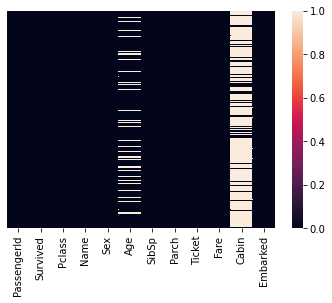

In [6]:
sns.heatmap(df.isnull(),yticklabels=False)

Here we could see that we have a huge number of missing value in Cabin column, so we will drop out this column later

Now let's visualize the features so that we could know the relation between features.

<AxesSubplot:xlabel='Survived', ylabel='count'>

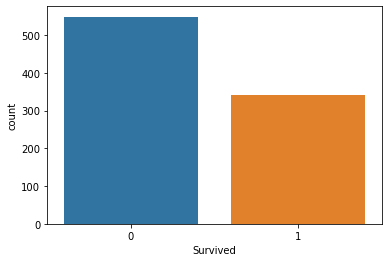

In [7]:
sns.countplot(x='Survived',data=df)

we could see here that the number of people who has survived is actually less than the unsurvived. Now we will see the proportion of the male and female who has survived.



<AxesSubplot:xlabel='Survived', ylabel='count'>

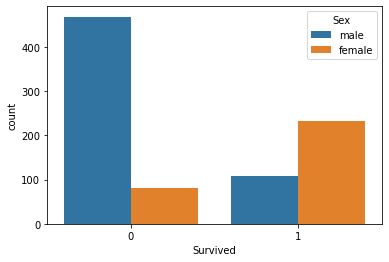

In [8]:
sns.countplot(x='Survived',hue='Sex',data=df)

Here we can see that most of the male didn't survived compared to female. comparatively, in survived column number of female who has survived is more that to the male

In [9]:
df.columns




Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

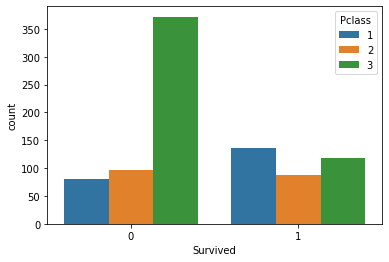

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

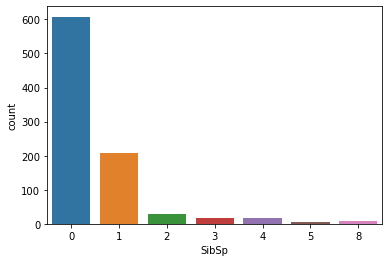

In [11]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

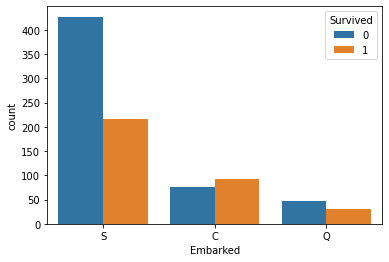

In [12]:
sns.countplot(x='Embarked', hue='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

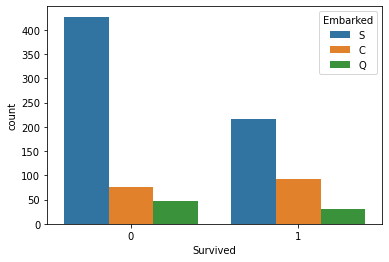

In [13]:
sns.countplot(x='Survived',hue='Embarked',data=df)

<AxesSubplot:>

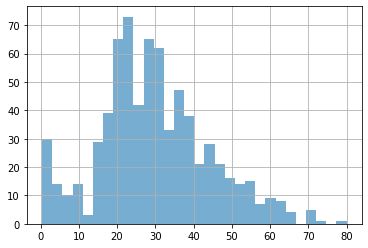

In [14]:
df['Age'].hist(bins=30,alpha=0.6)

# Feature Engineering

Here, in this section we will remove the missing values and convert categorical feature to dummy variable.

As we have seen that there were 2 columns i.e, Age and Cabin in which we had null values. we will try to handle those missing values 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

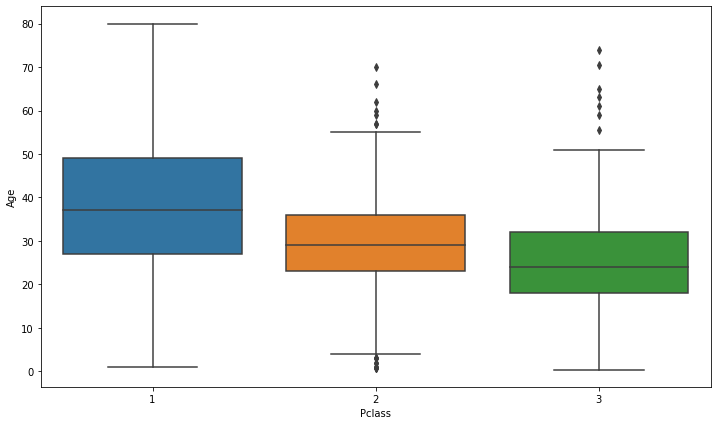

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Age',x='Pclass',data=df)

Now we will replace the null values of Pclass with the mean value of age as shown in above fig.

In [16]:
def age_calc(cols):
    Age =cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [17]:
df['Age'] = df[['Age','Pclass']].apply(age_calc,axis=1)

<AxesSubplot:>

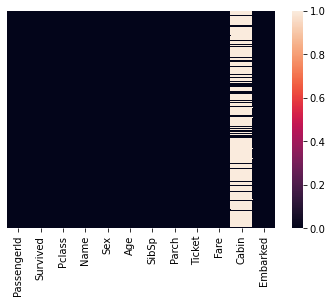

In [18]:
sns.heatmap(df.isnull(),yticklabels=False)

I dropped the cabin column as there were more missing values and also we will not use that for prediction

In [19]:
df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

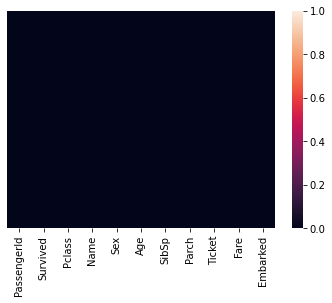

In [20]:
sns.heatmap(df.isnull(),yticklabels=False)

In [21]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

As we can see here that we have 4 categorical feature i.e, Name,sex,Ticket and Embarked.

Name and Ticket column is not that important for our analysis so,we could drop these features and will convert the remaining into dummy variable

In [22]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark= pd.get_dummies(df['Embarked'],drop_first=True)

In [23]:
df.drop(['Name','Ticket','Sex','Embarked','PassengerId'],axis=1,inplace=True)

In [24]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [25]:
df=pd.concat([df,sex,embark],axis=1)

In [26]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now,our data is ready for our model

# Logistic Regression Model

In [27]:
x = df.drop('Survived',axis=1)

In [28]:
y = df[['Survived']]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log=LogisticRegression()
log.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
pred=log.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix

In [42]:
accuracy = confusion_matrix(y_test,pred)

In [36]:
accuracy

array([[101,  11],
       [ 18,  49]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy=accuracy_score(y_test,pred)

In [39]:
accuracy

0.8379888268156425

We got an accuracy of 83% which is not bad.